# Présentation de la recherche 

## Benchmarking et Analyse Expérimentale des Algorithmes et Modèles de l'IA

### ETAPE 1 

In [1]:
#### 2.3 Choix d'un algorithme

L'algorithme que nous avons choisi dans cette étape est ***CMA-ES (Covariance Matrix Adaptation Evolution Strategy).***

##### Qu'est ce que CMAES ?

CMA-ES est un algorithme d'optimisation évolutif basé sur une stratégie d'évolution. Il est particulièrement efficace pour résoudre des problèmes d'optimisation non linéaires, continus et sans gradient.
Il fonctionne comme suit : 
- Initialisation :
        L'algorithme commence avec une population initiale d'individus générés aléatoirement.
        Une distribution gaussienne est utilisée pour définir les solutions candidates.
- Évaluation et sélection :
        Chaque individu est évalué en fonction de la fonction objectif.
        Les meilleurs individus sont sélectionnés pour guider l'évolution.
- Adaptation de la covariance :
        Contrairement aux algorithmes évolutionnaires classiques, CMA-ES ajuste dynamiquement la matrice de covariance.
        Cela permet d'adapter la direction et l'amplitude des mutations en fonction de la topologie du paysage de la fonction.
- Nouvelle génération :
    De nouvelles solutions sont échantillonnées à partir de la distribution mise à jour.
    Le processus est répété jusqu'à convergence ou un critère d'arrêt prédéfini.

#### 5. Visualisation des résultats de l'exécutetion de CMA-ES sur un ensemble de données.

Le CMA-ES (Covariance Matrix Adaptation Evolution Strategy) est un algorithme d’optimisation stochastique, on remarque que chaque exécution (ou run) est différente à cause des éléments suivants :

- Initialisation aléatoire:
    CMA-ES commence avec une population initiale qui est choisie aléatoirement dans l’espace de recherche.
    Donc, chaque exécution part d’un point de départ différent, ce qui affecte le trajet de convergence.
- Mutation et recombinaison:
    Les individus (solutions candidates) sont générés avec des perturbations aléatoires.
    À chaque génération, de nouveaux candidats sont échantillonnés à partir d’une distribution gaussienne qui évolue au fil du temps.
    Cela signifie que même si on optimise la même fonction, les valeurs précises à chaque étape changent.
- Sélection et mise à jour de la distribution:

Même si les tendances globales sont similaires, les détails du chemin de convergence diffèrent d’une exécution à l’autre.

###### Affichage de chaque exécution du fichier f1 de dimension 1 dans une figure différente

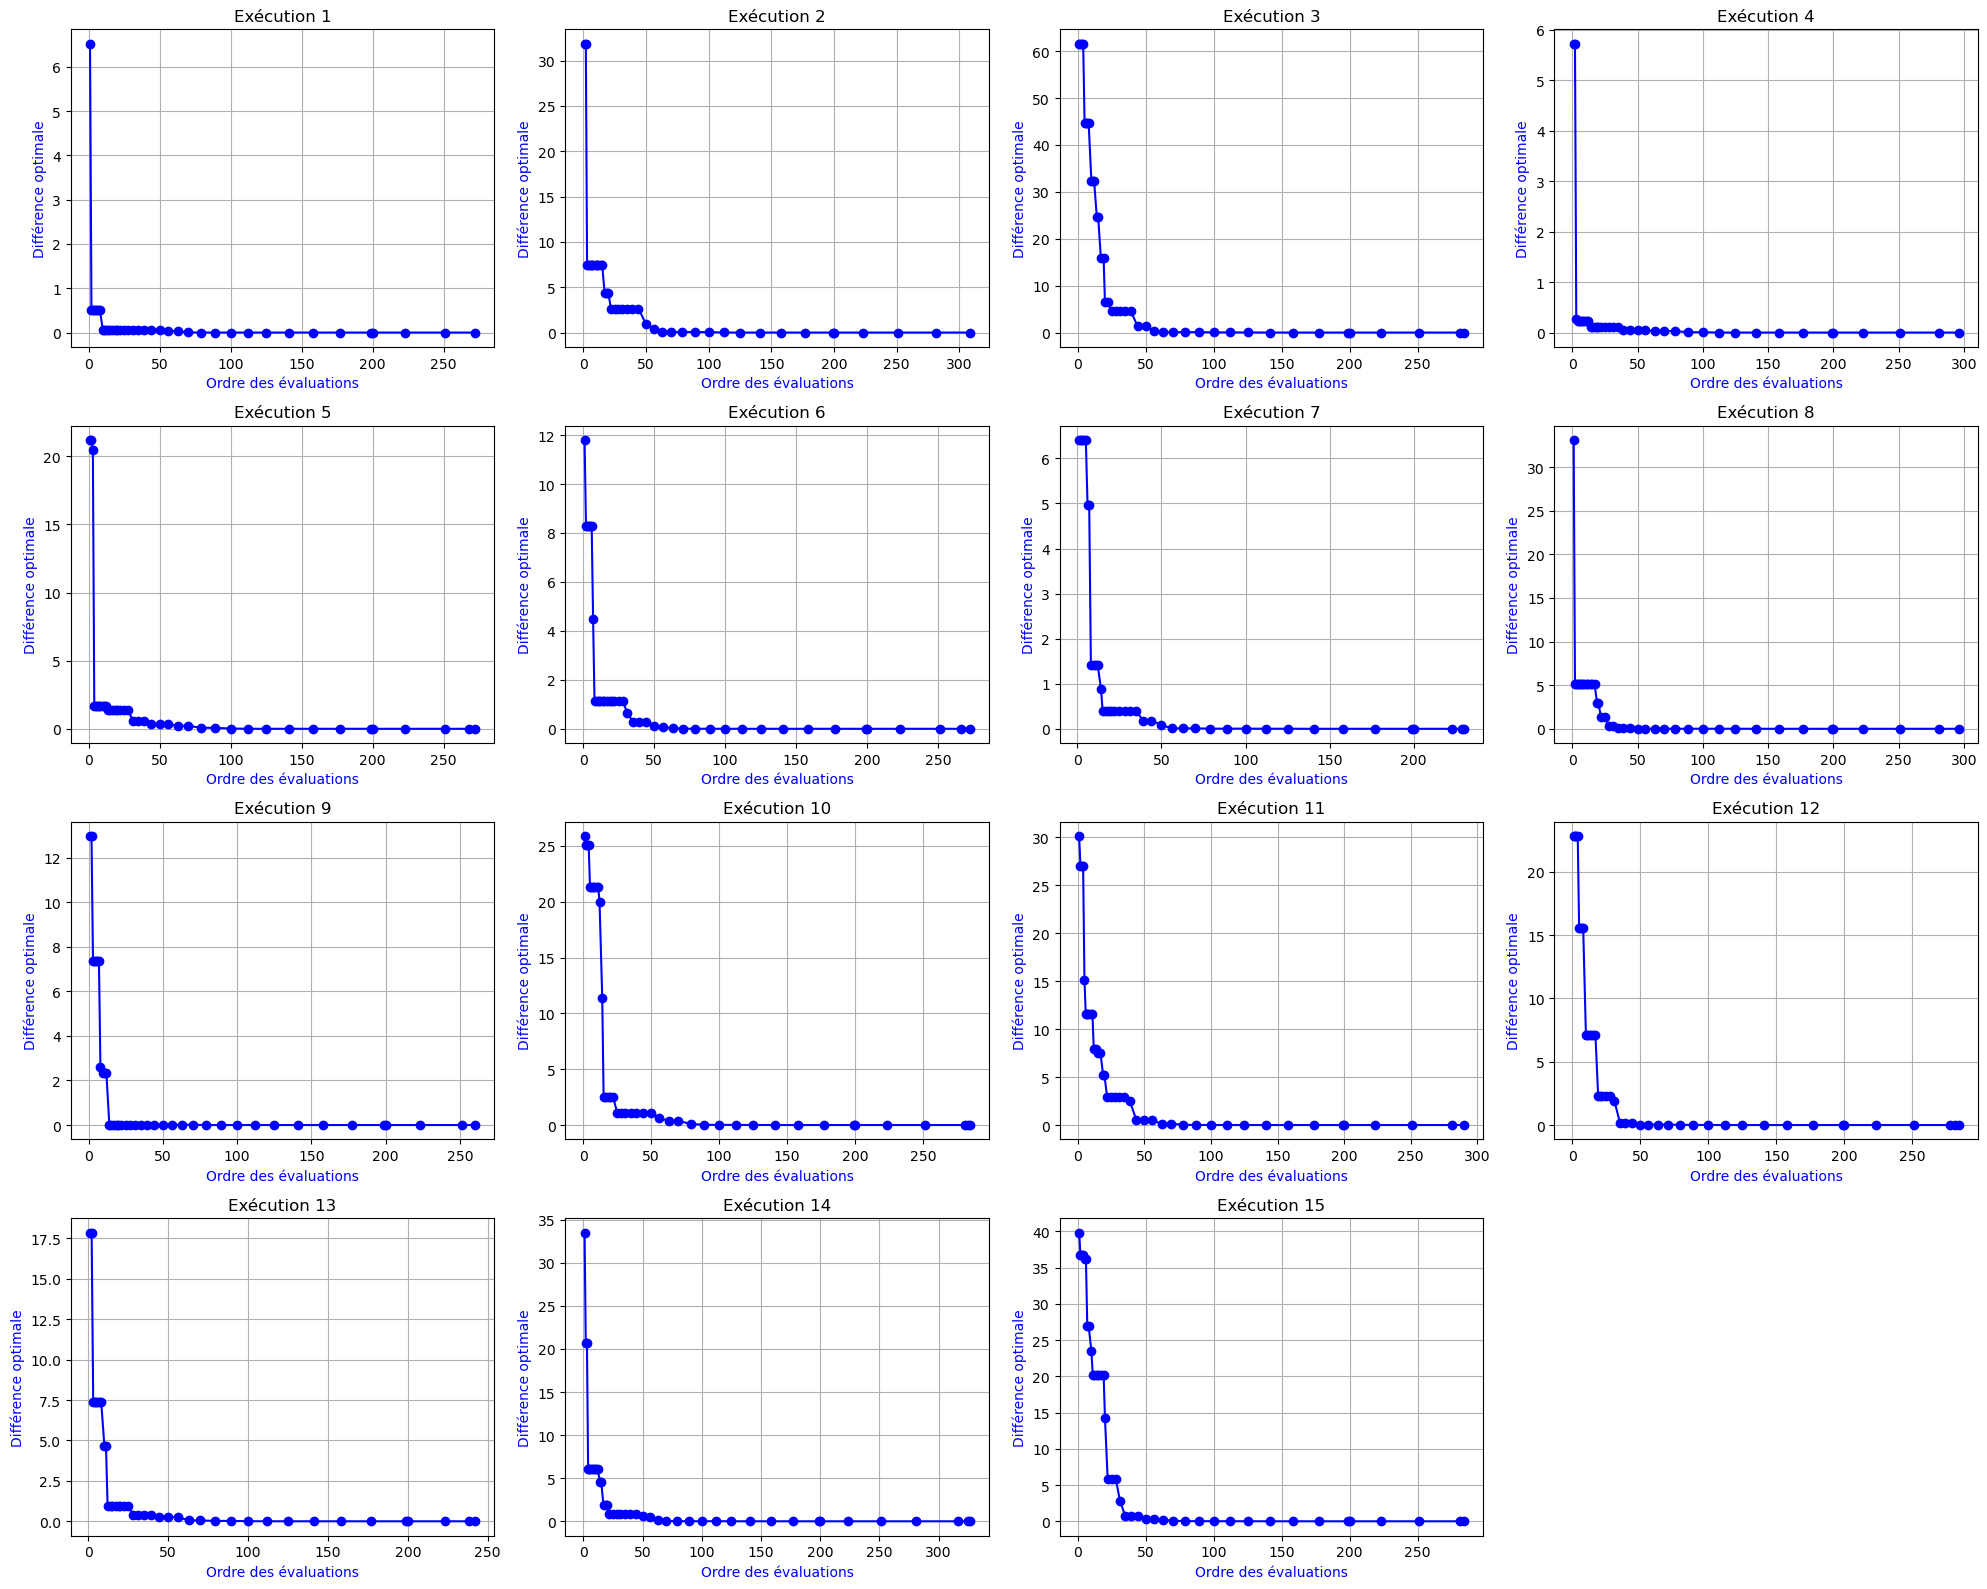

In [2]:
import matplotlib.pyplot as plt
import math

# Ouvrir le fichier .tdat
with open("bbobexp_f1_DIM2.tdat", "r") as f:
    lignes = f.readlines()

# Initialisation des listes pour stocker toutes les exécutions
executions = []
x, y = [], []
debut = False

# Lecture des lignes du fichier
for ligne in lignes:
    ligne = ligne.strip()
    
    if ligne.startswith('% function evaluation | noise-free fitness'):
        debut = True  # Début de l'exécution
        if x and y:
            executions.append((x, y))
            x, y = [], []  # Réinitialisation des listes
    
    elif debut and ligne and not ligne.startswith('%'):
        valeurs = ligne.split()
        x.append(int(valeurs[0]))  # Ordre des évaluations
        y.append(float(valeurs[2]))  # Meilleure différence

# Ajouter la dernière exécution si elle n'a pas été ajoutée
if x and y:
    executions.append((x, y))

# Détermination des dimensions de la grille
n = len(executions)
cols = math.ceil(math.sqrt(n))  # Nombre de colonnes (optimisé)
rows = math.ceil(n / cols)  # Nombre de lignes

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Transformation en liste pour accès facile

# Génération des graphiques
for i, (x, y) in enumerate(executions):
    axes[i].plot(x, y, linestyle="-", marker="o", color="b")
    axes[i].set_xlabel("Ordre des évaluations", color="b")
    axes[i].set_ylabel("Différence optimale", color="b")
    axes[i].set_title(f"Exécution {i+1}")
    axes[i].grid()

# Suppression des sous-graphiques vides (si le nombre d'exécutions < nb total de subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement
fig.tight_layout()
plt.show()


###### Affichage de toutes les exécutions du fichier f1 de dimension 1 dans la même figure

On définit une fonction qui fait l'affichage des exécutions du fichier passé en paramétre

In [48]:
import matplotlib.pyplot as plt

def Affichage_fn(fichier):

    # Définition des couleurs (au cas où il y aurait plus de runs)
    couleurs = [
        "b", "g", "r", "c", "m", "y", "k", "orange", "purple", "brown",
        "pink", "lime", "teal", "navy", "gold"
    ]

    plt.figure(figsize=(10, 6))  # Une seule figure

    # Parcourir chaque fichier et récupérer les deux premiers runs
    couleur_index = 0  # Suivi des couleurs utilisées

    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x, y = [], []
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x and y:
                runs.append((x, y))  # Ajouter le run à la liste
            debut = True  # Début d'une nouvelle exécution
            x, y = [], []  # Réinitialisation des listes

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x.append(int(valeurs[0]))  # Ordre des évaluations
            y.append(float(valeurs[2]))  # Meilleure différence

    # Ajouter le dernier run s'il n'a pas été ajouté
    if x and y and len(runs) < 15:
        runs.append((x, y))

    # Affichage des runs sur la même figure
    for j, (x_vals, y_vals) in enumerate(runs):
        plt.plot(
            x_vals, y_vals, linestyle="-", marker="o",
            color=couleurs[couleur_index % len(couleurs)], 
            label=f"Run {j+1}"
        )
        couleur_index += 1  # Passer à la couleur suivante

    # Ajout des labels et titre
    plt.xlabel("Ordre des évaluations")
    plt.ylabel("Différence fonction sans bruit - optimale")
    plt.title("Affichage de toutes les exécutions du fichier f1")
    plt.legend()  # Affichage de la légende
    plt.grid(True)

    plt.show()


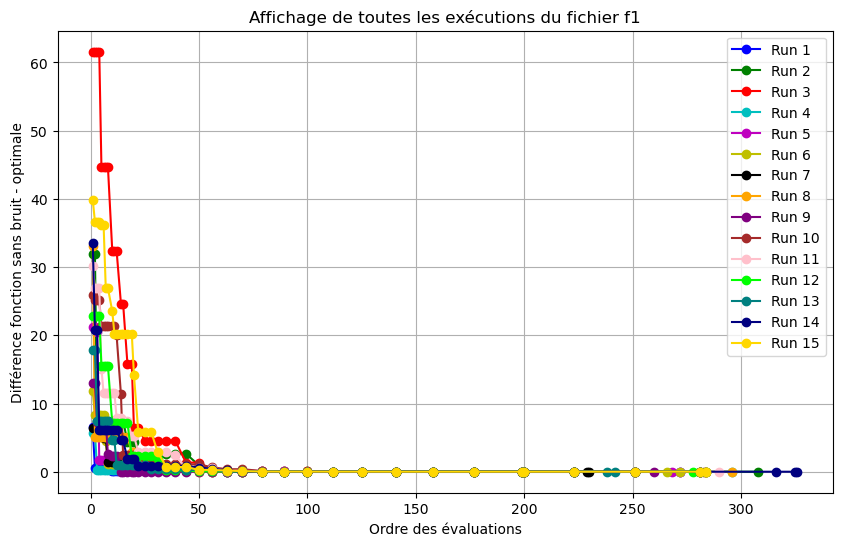

In [47]:
Affichage_fn("bbobexp_f1_DIM2.tdat")

Chaque fichier correspond à une fonction d’optimisation différente.Certaines fonctions ont un gradient clair et convergent rapidement , d'autres sont plus rugueuses avec des pièges locaux, rendant l’optimisation plus difficile.

###### Affichage de toutes les exécutions du fichier f2 de dimension 2 

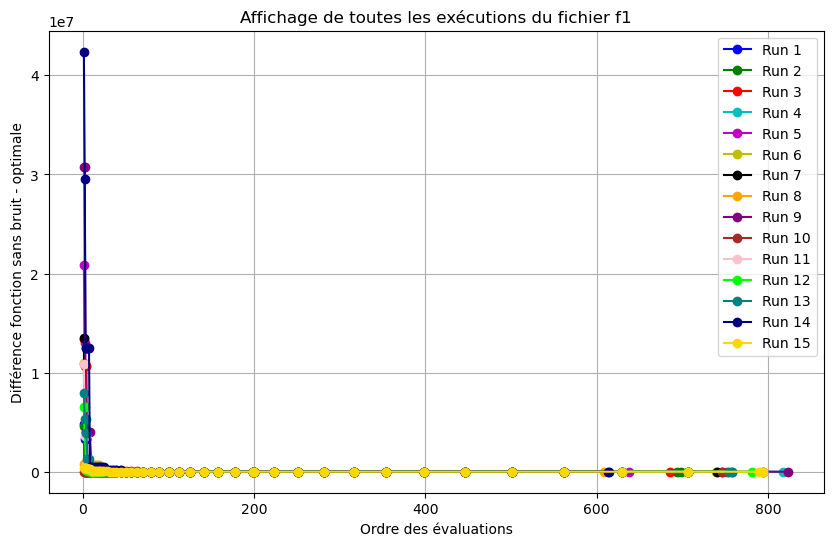

In [39]:
Affichage_fn("bbobexp_f2_DIM2.tdat")

#### 6. Choix d'une agrégation

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def Agrégation_fn(fichier, ax):
    with open(fichier, "r") as f:
        lignes = f.readlines()

    runs = []  # Liste pour stocker les runs (x, y)
    x_vals_all, y_vals_all = [], []  
    debut = False

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('% function evaluation | noise-free fitness'):
            if x_vals_all and y_vals_all:
                runs.append((x_vals_all, y_vals_all))  
            debut = True  
            x_vals_all, y_vals_all = [], []  

        elif debut and ligne and not ligne.startswith('%'):
            valeurs = ligne.split()
            x_vals_all.append(int(valeurs[0]))  
            y_vals_all.append(float(valeurs[2]))  

    if x_vals_all and y_vals_all:
        runs.append((x_vals_all, y_vals_all))

    # Trouver la longueur minimale des runs pour aligner les données
    min_len = min(len(run[0]) for run in runs)
    x_common = runs[0][0][:min_len]  # On prend les x du premier run tronqués

    y_matrix = np.array([run[1][:min_len] for run in runs])  # Matrice des y

    # Calcul des statistiques descriptives
    y_mean = np.mean(y_matrix, axis=0)  # Moyenne
    y_std = np.std(y_matrix, axis=0)  # Écart-type

    # Affichage de la courbe moyenne avec une enveloppe
    ax.plot(x_common, y_mean, color="b", label="Moyenne des runs")
    ax.fill_between(x_common, y_mean - y_std, y_mean + y_std, color="b", alpha=0.2, label="Écart-type")

    ax.set_xlabel("Ordre des évaluations")
    ax.set_ylabel("Différence fonction sans bruit - optimale")
    ax.set_title(f"Agrégation des runs - {fichier}")
    ax.legend()
    ax.grid(True)


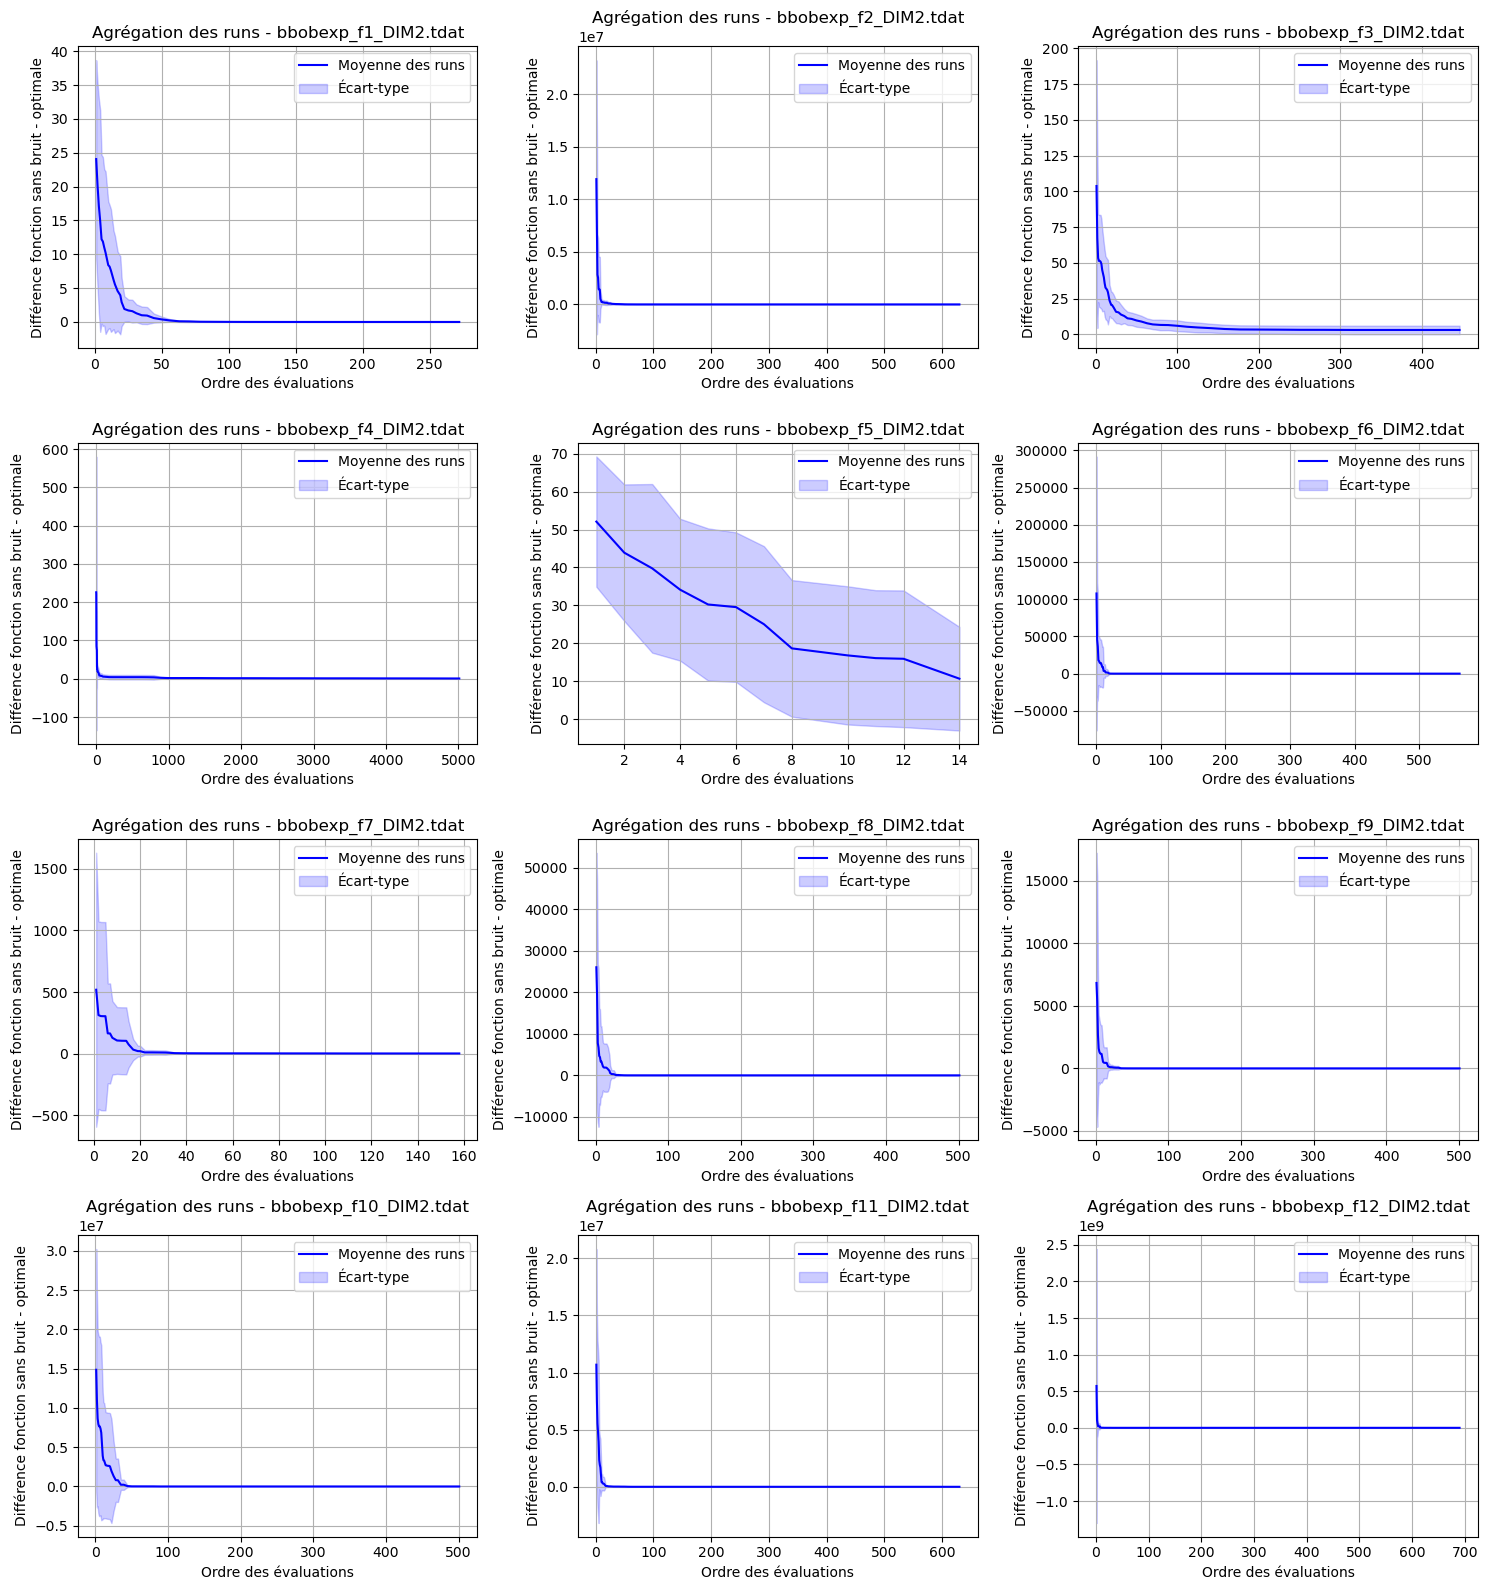

In [56]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "bbobexp_f1_DIM2.tdat",
    "bbobexp_f2_DIM2.tdat",
    "bbobexp_f3_DIM2.tdat",
    "bbobexp_f4_DIM2.tdat",
    "bbobexp_f5_DIM2.tdat",
    "bbobexp_f6_DIM2.tdat",
    "bbobexp_f7_DIM2.tdat",
    "bbobexp_f8_DIM2.tdat",
    "bbobexp_f9_DIM2.tdat",
    "bbobexp_f10_DIM2.tdat",
    "bbobexp_f11_DIM2.tdat",
    "bbobexp_f12_DIM2.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Convertir en tableau 1D pour un accès plus facile
axes = np.array(axes).flatten()

# Afficher les fichiers
for i, fichier in enumerate(fichiers):
    Agrégation_fn(fichier, axes[i])

# Supprimer les axes vides si le nombre de fichiers < nb total de cases
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

###### Performance en fonction du type de la fonction

On a 5 types de fonctions on prendra une de chacun des types et on variera la dimension pour voir comment la performance de l'algorithme différe.
- Type : Seprable : f1-f5
- Type : Low or moderate conditionning : f6 - f9
- Type : High conditionning and unimodal : f10 - f14 
- Type : Multi-modal with adequate global structure : f15-f19
- Type : Mutli-modal with weak global structure : f20 - f24 

###### Type 1 : Fonction separable : f5 

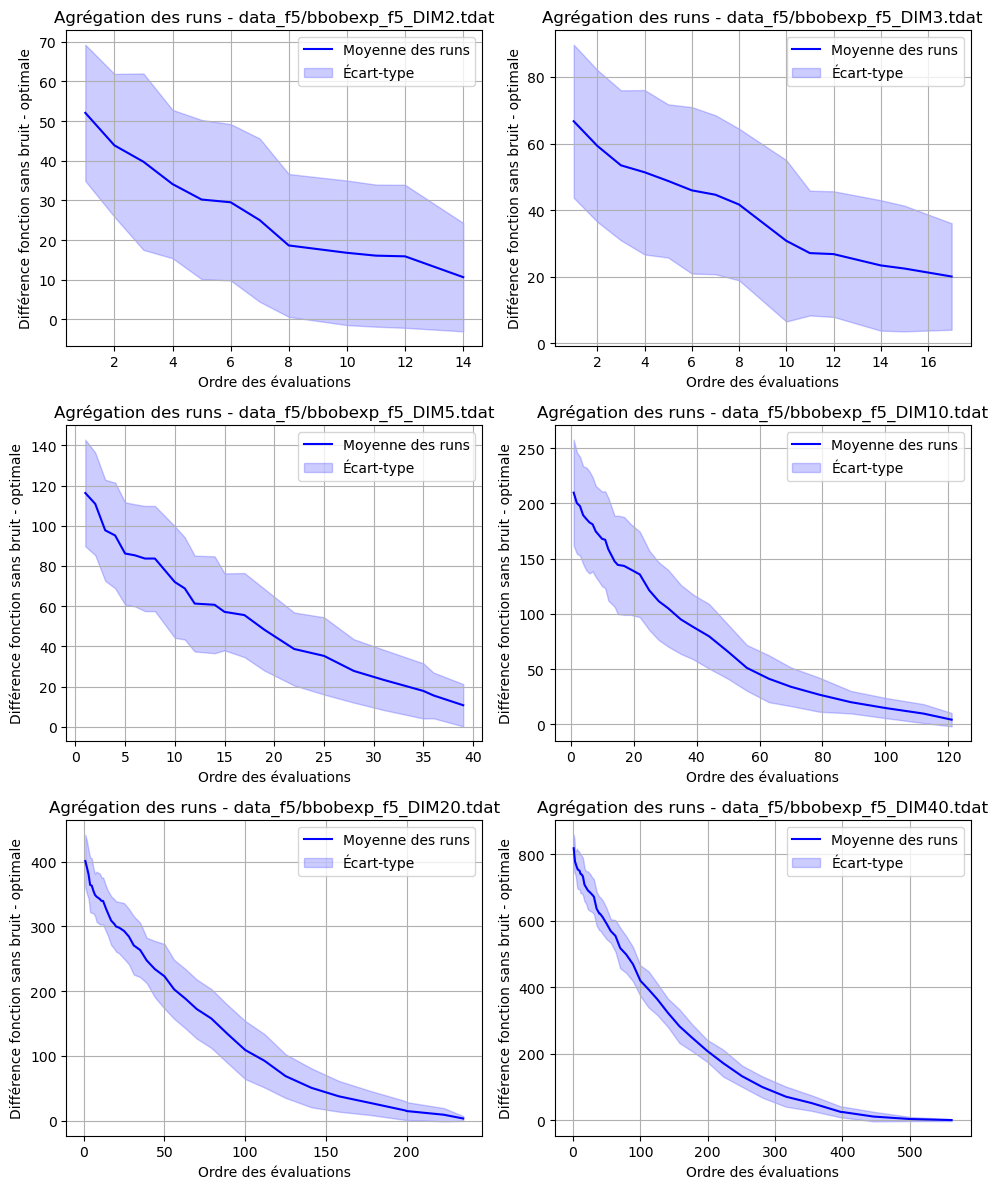

In [59]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "data_f5/bbobexp_f5_DIM2.tdat",
    "data_f5/bbobexp_f5_DIM3.tdat",
    "data_f5/bbobexp_f5_DIM5.tdat",
    "data_f5/bbobexp_f5_DIM10.tdat",
    "data_f5/bbobexp_f5_DIM20.tdat",
    "data_f5/bbobexp_f5_DIM40.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Convertir en tableau 1D pour un accès plus facile
axes = np.array(axes).flatten()

# Afficher les fichiers
for i, fichier in enumerate(fichiers):
    Agrégation_fn(fichier, axes[i])

# Supprimer les axes vides si le nombre de fichiers < nb total de cases
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

In [ ]:
###### Type 2 : Fonction Low or moderate conditionning : f8

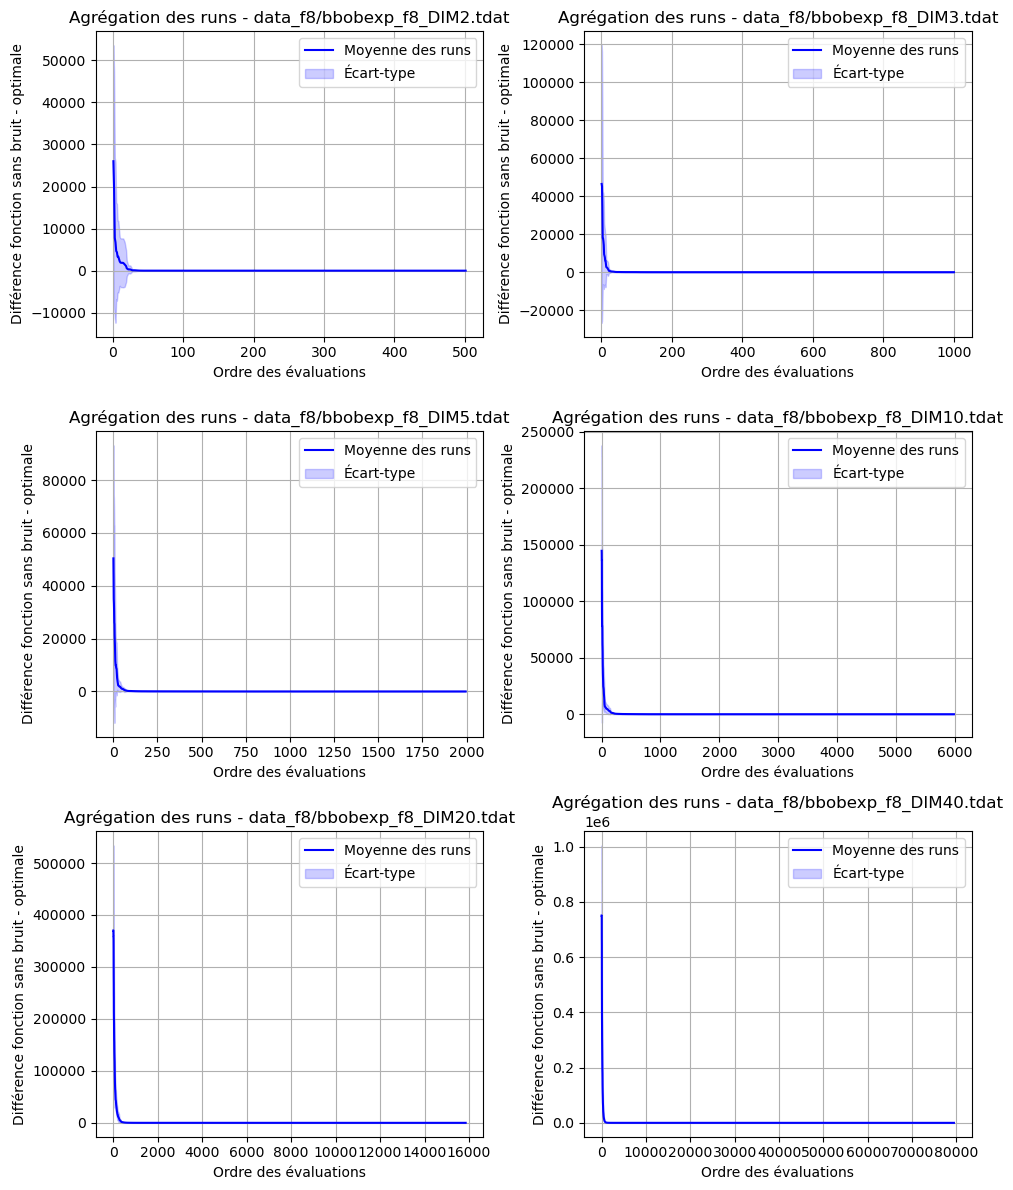

In [62]:
# Liste des fichiers (modifie selon tes besoins)
fichiers = [
    "data_f8/bbobexp_f8_DIM2.tdat",
    "data_f8/bbobexp_f8_DIM3.tdat",
    "data_f8/bbobexp_f8_DIM5.tdat",
    "data_f8/bbobexp_f8_DIM10.tdat",
    "data_f8/bbobexp_f8_DIM20.tdat",
    "data_f8/bbobexp_f8_DIM40.tdat"
]

# Déterminer la taille de la grille automatiquement
n = len(fichiers)
rows = int(np.ceil(n ** 0.5))  # Nombre de lignes
cols = int(np.ceil(n / rows))  # Nombre de colonnes

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Convertir en tableau 1D pour un accès plus facile
axes = np.array(axes).flatten()

# Afficher les fichiers
for i, fichier in enumerate(fichiers):
    Agrégation_fn(fichier, axes[i])

# Supprimer les axes vides si le nombre de fichiers < nb total de cases
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()